## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


### Find no.of samples are there in training and test datasets

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_test.shape

(10000,)

In [0]:
import matplotlib.pyplot as plt


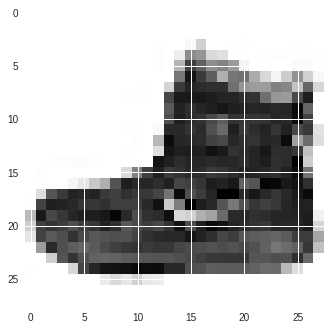

In [7]:
plt.imshow(x_train[0])

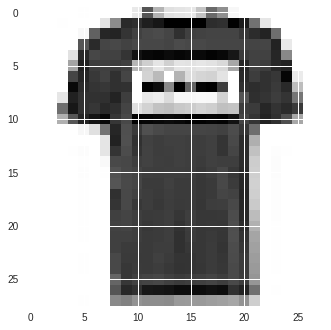

In [8]:
plt.imshow(x_train[1])

### Find dimensions of an image in the dataset

In [9]:
x_train[0].shape

(28, 28)

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
import keras

In [13]:
import pandas as pd
pd.Series(y_train).value_counts()


9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [14]:
Y_train = keras.utils.to_categorical(y=y_train,num_classes=10,dtype='float32')
Y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
Y_test = keras.utils.to_categorical(y=y_test,num_classes=10,dtype='float32')
Y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [16]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [0]:
X_train = x_train/255
X_test = x_test/255

In [18]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
Y_train.shape

(60000, 10)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

### Import the necessary layers from keras to build the model

In [0]:
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [23]:
#Define model
model = Sequential()

# 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))

# 2nd Conv Layer
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

# Flatten
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128))
model.add(Activation('relu'))

# Prediction Layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, 
validation_data=(X_test, Y_test), callbacks=callback_list)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.3705 - acc: 0.8671 - val_loss: 0.3219 - val_acc: 0.8753
Epoch 2/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.2273 - acc: 0.9160 - val_loss: 0.2547 - val_acc: 0.9095
Epoch 3/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.1640 - acc: 0.9386 - val_loss: 0.2427 - val_acc: 0.9145
Epoch 4/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.1139 - acc: 0.9573 - val_loss: 0.2807 - val_acc: 0.9147
Epoch 5/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.0763 - acc: 0.9722 - val_loss: 0.2892 - val_acc: 0.9143
Epoch 6/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.0509 - acc: 0.9817 - val_loss: 0.3484 - val_acc: 0.9114
Epoch 7/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.0381 - acc: 0.9866 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [24]:
#Define model
model1 = Sequential()

# 1st Conv Layer
model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.add(Activation('relu'))

# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))

# Max Pooling
model1.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model1.add(Dropout(0.25))

# Flatten
model1.add(Flatten())

# Fully Connected Layer
model1.add(Dense(128))
model1.add(Activation('relu'))

# Prediction Layer
model1.add(Dense(10))
model1.add(Activation('softmax'))

# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model1.fit(X_train, Y_train, batch_size=32, nb_epoch=10, 
validation_data=(X_test, Y_test), callbacks=callback_list)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.3993 - acc: 0.8558 - val_loss: 0.3204 - val_acc: 0.8887
Epoch 2/10
60000/60000 [==============================] - 16s 265us/step - loss: 0.2625 - acc: 0.9039 - val_loss: 0.2626 - val_acc: 0.9029
Epoch 3/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.2146 - acc: 0.9203 - val_loss: 0.2457 - val_acc: 0.9096
Epoch 4/10
60000/60000 [==============================] - 16s 265us/step - loss: 0.1805 - acc: 0.9323 - val_loss: 0.2278 - val_acc: 0.9178
Epoch 5/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.1522 - acc: 0.9423 - val_loss: 0.2315 - val_acc: 0.9185
Epoch 6/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.1304 - acc: 0.9509 - val_loss: 0.2299 - val_acc: 0.9249
Epoch 7/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.1111 - acc: 0.9581 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

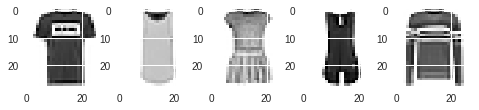

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 2
for i in range(1, 6):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[i])
plt.show()

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=True)  # randomly flip images

# Prepare the generator
datagen.fit(X_train)

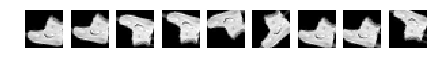

In [28]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 10):
    plt.subplot(1,10,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [29]:
model1.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), validation_data=(X_test, Y_test), epochs=10, steps_per_epoch=len(X_train)//32)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.8564 - acc: 0.6839 - val_loss: 0.4235 - val_acc: 0.8501
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.6414 - acc: 0.7641 - val_loss: 0.4191 - val_acc: 0.8530
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5804 - acc: 0.7873 - val_loss: 0.3795 - val_acc: 0.8646
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5446 - acc: 0.7983 - val_loss: 0.3711 - val_acc: 0.8673
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5239 - acc: 0.8067 - val_loss: 0.3695 - val_acc: 0.8698
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5034 - acc: 0.8155 - val_loss: 0.3580 - val_acc: 0.8719
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4869 - acc: 0.8215 - val_loss: 0.3752 - val_acc: 0.8685
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [30]:
loss_and_metrics = model1.evaluate(X_train, Y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 5s 85us/step
[0.3132331982870897, 0.8832666666666666]


In [31]:
loss_and_metrics_test = model1.evaluate(X_test, Y_test)
print(loss_and_metrics_test)

10000/10000 [==============================] - 1s 84us/step
[0.3506368566036224, 0.8754]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [34]:
x_train.shape

(50000, 32, 32, 3)

In [54]:
x_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [35]:
x_test.shape

(10000, 32, 32, 3)

In [36]:
y_train.shape

(50000, 1)

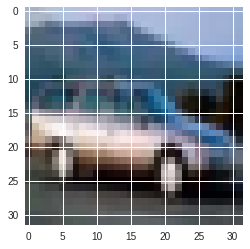

In [67]:
plt.imshow(x_train[4])

In [37]:
y_test.shape

(10000, 1)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen3 = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images


### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen3.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

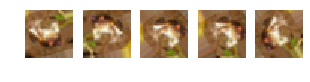

In [68]:
from matplotlib import pyplot as plt
%matplotlib inline
gen = datagen3.flow(x_train[0:1]/255, batch_size=1)
for i in range(1, 6):
    plt.subplot(1,6,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()